------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
------------------------


<Figure size 640x480 with 0 Axes>

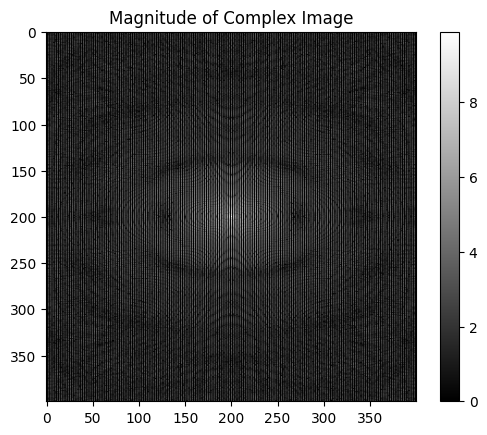

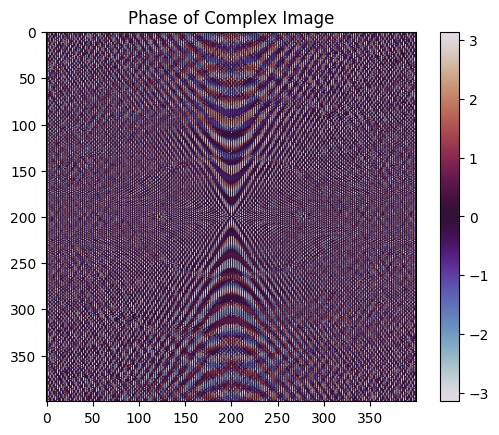

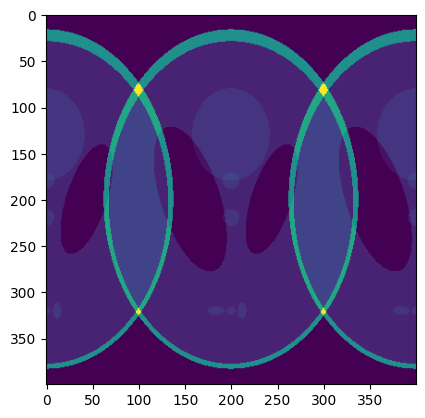

In [ ]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from MAP.masks import SimpleMask

'''
# Load and preprocess image
img = shepp_logan_phantom()
img = resize(img, (256, 256), anti_aliasing=True)

# Simulate full k-space
kspace_full = fft2c(img)

# Create undersampling mask (e.g., random or Cartesian)
mask = create_random_mask(img.shape, acceleration=4)

# Undersample
kspace_under = kspace_full * mask

# Reconstruct
recon = map_reconstruct(kspace_under, mask, lam=0.01, delta=0.01, sigma2=0.01, num_iters=100)

# Plot results
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Reconstruction")
plt.imshow(np.abs(recon), cmap='gray')
plt.show()


def create_random_mask(shape, acceleration=4, center_fraction=0.1, seed=None):
    """
    Create a 2D random undersampling mask (Cartesian along rows).
    
    Parameters:
    - shape: tuple (H, W) of the image/k-space
    - acceleration: undersampling factor (e.g. 4 means 25% sampled)
    - center_fraction: fraction of low-freq lines to always keep
    - seed: random seed for reproducibility

    Returns:
    - mask: binary np.array with 1s where sampled, 0s elsewhere
    """
    if seed is not None:
        np.random.seed(seed)

    height, width = shape

    # Always keep low frequencies in the center
    num_low_freqs = int(height * center_fraction)
    center_start = (height - num_low_freqs) // 2
    center_end = center_start + num_low_freqs

    # Initialize mask
    mask = np.zeros((height, width), dtype=np.float32)

    # Select lines to sample outside the center
    num_lines = int(height / acceleration)
    prob = np.ones(height)
    prob[center_start:center_end] = 0  # already included

    candidate_lines = np.where(prob > 0)[0]
    sampled_lines = np.random.choice(candidate_lines, size=num_lines - num_low_freqs, replace=False)

    # Set sampled lines
    mask[sampled_lines, :] = 1
    mask[center_start:center_end, :] = 1  # keep center

    return mask

'''

mask = SimpleMask(2)

shepp_logan = ski.data.shepp_logan_phantom()
kspace_shepp = np.fft.fft2(shepp_logan)
kspace_shepp_shifted = np.fft.fftshift(kspace_shepp) # shift to center the zero frequency for better visualization

reconstructed = np.real(np.fft.ifft2(kspace_shepp))
reconstructed_mag = np.real(np.fft.ifft2(np.abs(kspace_shepp) * np.exp(1j * 0)))
reconstructed_phase = np.real(np.fft.ifft2(np.exp(1j * np.angle(kspace_shepp))))

masked_kspace_shepp = mask.mask_columns(kspace_shepp)
masked_kspace_shepp_shifted = np.fft.fftshift(masked_kspace_shepp) # shift to center the zero frequency for better visualization

masked_reconstructed = np.real(np.fft.ifft2(masked_kspace_shepp))
masked_reconstructed_mag = np.real(np.fft.ifft2(np.abs(kspace_shepp) * np.exp(1j * 0)))
masked_reconstructed_phase = np.real(np.fft.ifft2(np.exp(1j * np.angle(kspace_shepp))))

#x4 = np.random.rand(8,8)
#print(x4)
print('------------------------')
#print(x3)
print(shepp_logan)
print('------------------------')


plt.figure()
#plt.imshow(masked_shepp_logan, cmap='gray')

plt.figure()
plt.imshow(np.log(1 + np.abs(masked_kspace_shepp_shifted)), cmap='gray') # np.log to compress the dynamic range
plt.colorbar()
plt.title("Magnitude of Complex Image")

plt.figure()
plt.imshow(np.angle(masked_kspace_shepp_shifted), cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.title("Phase of Complex Image")

plt.figure()
plt.imshow(masked_reconstructed)

plt.show()